<a href="https://colab.research.google.com/github/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
pd.__version__

'0.23.4'

In [159]:
# install older version of pandas
!pip install pandas==0.23.4

In [0]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [161]:
# Check pandas version again by doing RESTART & RUN ALL
pd.__version__

'0.23.4'

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [162]:
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [163]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [164]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []
random.seed(100) # Set seed for reproducibility

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=341.9790515007597, mobile=False), User(purchased=True, time_on_site=34.35775861345752, mobile=True), User(purchased=False, time_on_site=126.70673079042234, mobile=False), User(purchased=False, time_on_site=30.844477406989927, mobile=True), User(purchased=True, time_on_site=130.28302197834566, mobile=False), User(purchased=False, time_on_site=251.80068638723867, mobile=True), User(purchased=True, time_on_site=171.91794654749313, mobile=True), User(purchased=True, time_on_site=405.3539045504913, mobile=False), User(purchased=False, time_on_site=38.58643005300227, mobile=True), User(purchased=True, time_on_site=239.52960168497634, mobile=True)]


In [165]:
# Let's put this in a dataframe so we can look at it more easily
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,341.979052,False
1,True,34.357759,True
2,False,126.706731,False
3,False,30.844477,True
4,True,130.283022,False


In [166]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
purchased       1000 non-null bool
time_on_site    1000 non-null float64
mobile          1000 non-null bool
dtypes: bool(2), float64(1)
memory usage: 9.8 KB


In [167]:
user_data.describe()

,time_on_site
count,1000.000000
mean,195.160415
std,130.014047
min,5.089080
25%,96.720146
50%,179.672397
75%,263.814023
max,599.539677


In [168]:
user_data.describe(exclude=[np.number])

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,627,750


In [169]:
user_data.describe(include=bool)

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,627,750


In [170]:
user_data.describe(include=['bool'])

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,627,750


In [171]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.089079959772693,5.214435589906385,5.5973698583710565,5.635667731203808,6.14358703637421,6.826922023953648,6.835147486981073,7.120534930996337,8.088221744555954,8.238176853416398,8.909937483454579,9.515814075504018,9.78348671723457,10.101090913326072,10.777707216609976,11.248058384728106,11.462059356569224,11.573359330375268,11.575897125795226,11.71183978872287,11.899661962690466,12.990962364220564,13.330600676161552,13.955345839998218,14.234018142986459,14.315478124092717,14.59718006715806,14.758088602570293,14.798016107474611,15.280510516914754,15.311146939323939,15.568517361419774,15.571231788670818,15.766938247671177,16.24903907579221,16.475400948863896,16.595902828081243,16.67869623884208,16.97686899581148,16.999766960644966,...,499.6363835419104,501.89402323804774,504.7866144702347,508.1813536393598,509.94977985438834,512.9409119390027,513.4654879661915,513.9612768335396,515.3813299271035,518.2377356357891,519.4789560826948,524.9969552124553,526.1176329410342,534.156800807675,538.5870719051688,542.3823834115251,544.9711306835045,546.7333220960609,549.1283369270446,549.2170243254916,552.0573855521299,558.6043271948336,561.0477371867219,562.4859064920099,568.7760235417369,569.9180290939566,575.1555214458755,578.1610885300126,578.5417748910668,579.57077420405,579.8483231085819,580.0272614264908,581.6294548648808,589.0714110046416,591.1654150912292,592.0445830370513,595.3868877542628,597.9361109327675,598.8576701874757,599.539677408299
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,...,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0
True,0,1,0,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,0,1,1


In [172]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.495, 123.979]","(123.979, 242.869]","(242.869, 361.759]","(361.759, 480.65]","(480.65, 599.54]"
purchased,,,,,
False,230,228,111,40,18
True,103,133,89,22,26


In [173]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.495, 123.979]","(123.979, 242.869]","(242.869, 361.759]","(361.759, 480.65]","(480.65, 599.54]"
purchased,,,,,
False,0.690691,0.631579,0.555,0.645161,0.409091
True,0.309309,0.368421,0.445,0.354839,0.590909


In [174]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.68,0.609333
True,0.32,0.390667


In [175]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

ct = pd.crosstab([user_data['mobile'], time_bins], user_data['purchased'],
            rownames=['mobile', 'time on site'],
            colnames=['purchased'],
            normalize='columns'
            )
ct

purchased                     False     True 
mobile time on site                          
False  (4.495, 123.979]    0.070175  0.016086
       (123.979, 242.869]  0.052632  0.024129
       (242.869, 361.759]  0.055821  0.045576
       (361.759, 480.65]   0.063796  0.058981
       (480.65, 599.54]    0.028708  0.069705
True   (4.495, 123.979]    0.296651  0.260054
       (123.979, 242.869]  0.311005  0.332440
       (242.869, 361.759]  0.121212  0.193029

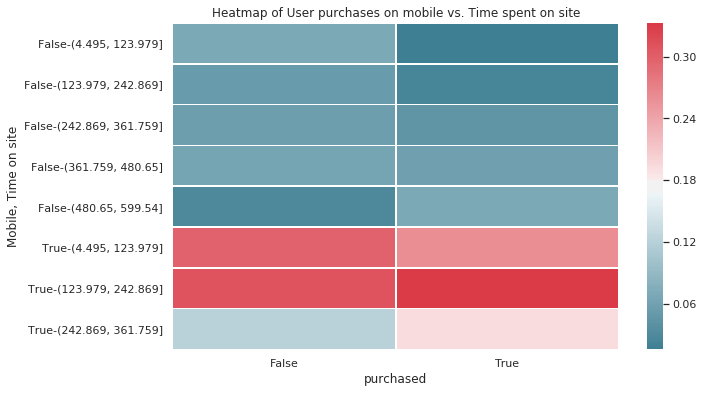

In [176]:
fig, axs = plt.subplots(figsize=(10, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ct, cmap=cmap,
                linewidths=.5, ax=axs)
plt.title('Heatmap of User purchases on mobile vs. Time spent on site')
plt.ylabel('Mobile, Time on site')
plt.show();

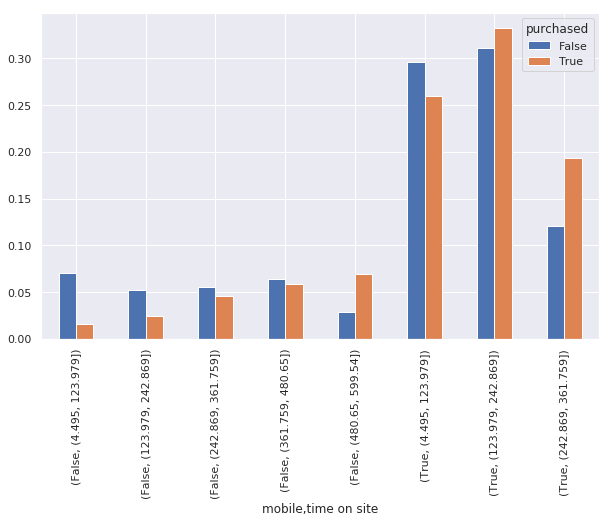

In [177]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ct.plot(kind='bar', ax=ax);

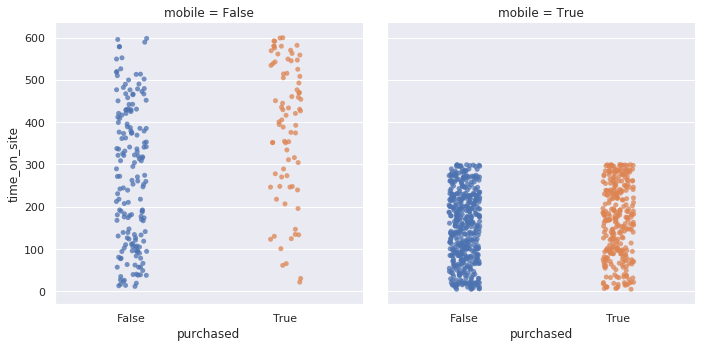

In [178]:
sns.catplot(x='purchased', y='time_on_site', 
            col='mobile', data = user_data,
            alpha=0.75);

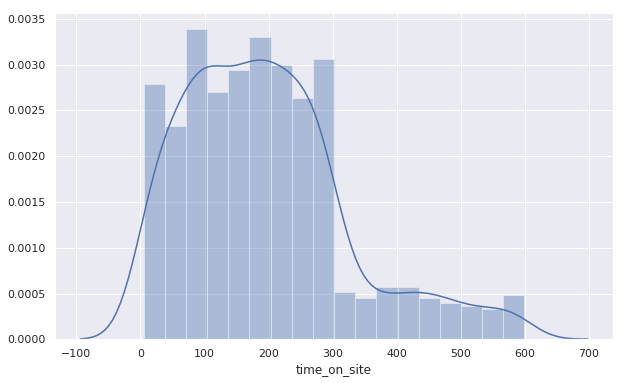

In [179]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.distplot(user_data['time_on_site'], ax=ax);

In [180]:
pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(4.495, 123.979]",0.309309
"(123.979, 242.869]",0.368421
"(242.869, 361.759]",0.445000
"(361.759, 480.65]",0.354839
"(480.65, 599.54]",0.590909


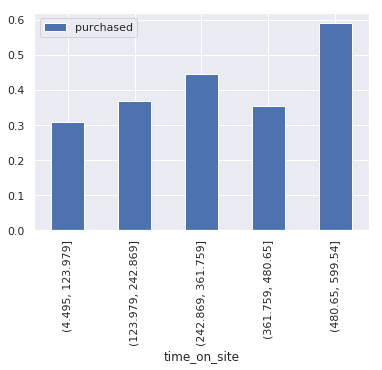

In [181]:
pt.plot.bar()

In [182]:
ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins],
            rownames=['mobile'],
            colnames=['purchased', 'time on site'],
            normalize='index'
            )
ct

purchased               False       ...                   True 
time on site (4.495, 123.979]       ...        (480.65, 599.54]
mobile                              ...                        
False                   0.176       ...                   0.104
True                    0.248       ...                   0.000

[2 rows x 10 columns]

In [183]:
a = [0.248, 0.260, 	0.101333, 0.129333, 	0.165333, 	0.096]
sum(a)

0.999999

In [184]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
            rownames=['time on site'],
            colnames=['purchased', 'mobile'],
            normalize='columns'
            )
ct

purchased              False             True           
mobile                 False     True    False     True 
time on site                                            
(4.495, 123.979]    0.258824  0.407002  0.0750  0.331058
(123.979, 242.869]  0.194118  0.426696  0.1125  0.423208
(242.869, 361.759]  0.205882  0.166302  0.2125  0.245734
(361.759, 480.65]   0.235294  0.000000  0.2750  0.000000
(480.65, 599.54]    0.105882  0.000000  0.3250  0.000000

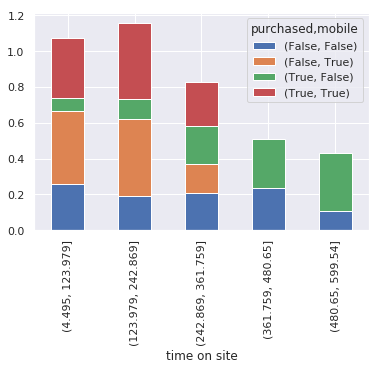

In [185]:
ct.plot(kind='bar', stacked=True)

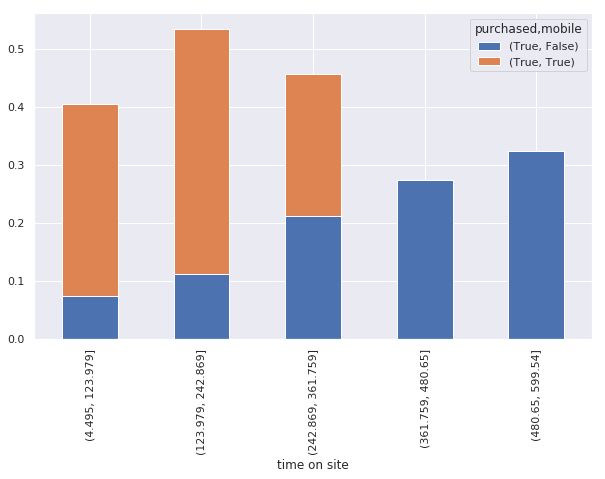

In [186]:
ct.iloc[:, [2, 3]].plot.bar(stacked=True, figsize=(10, 6));

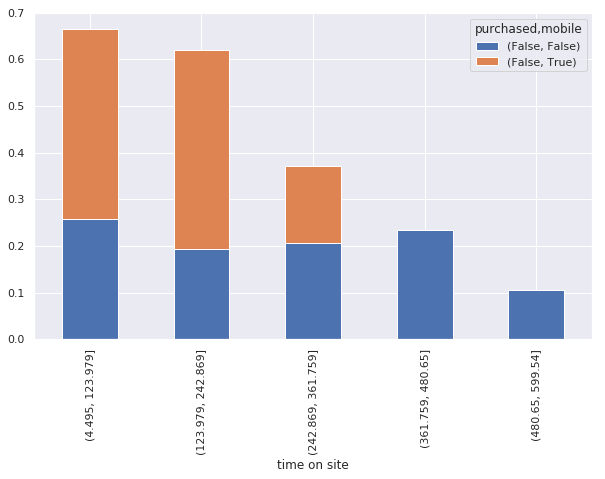

In [187]:
ct.iloc[:, [0, 1]].plot.bar(stacked=True, figsize=(10, 6));

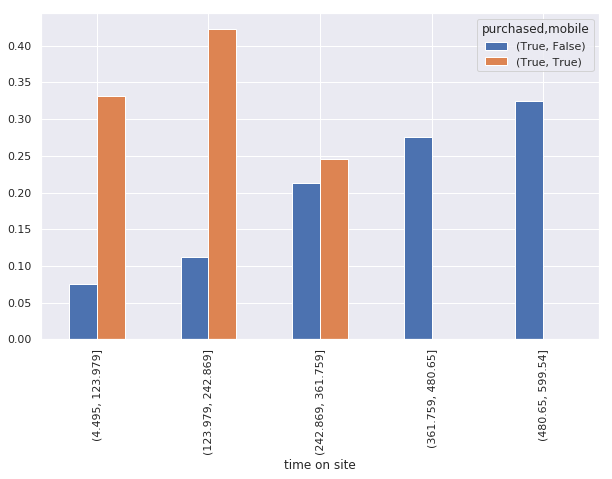

In [188]:
ct.iloc[:, [2, 3]].plot.bar(figsize=(10, 6));

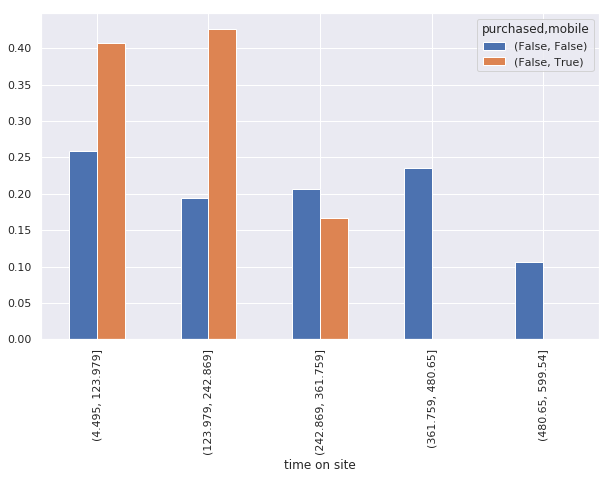

In [189]:
ct.iloc[:, [0, 1]].plot.bar(figsize=(10, 6));

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [191]:
file_url = 'https://raw.githubusercontent.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv' 
df = pd.read_csv(file_url, usecols = ['age', 'weight', 'exercise_time'])
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(3)
memory usage: 28.2 KB


In [193]:
df.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


### 1.  What are the variable types in the data?

`age (in years)` - is quantitative, discrete type   
`weight (lbs)` - is also quantitative, discrete type  
`exercise_time (in minutes/week)` - is also quantitative, discrete type  

### 2.  What are the relationships between the variables?


Depending on experiment deisgn, we can have multiple hypothesis here,


#### 1. Hypothesis: 'People that exercise more tend to weight less'.

Which makes:  

|Relationship    |   Variable     |
| ------------------- | --------------------- | 
|Independent variable (X) | `exercise_time` |   
| Dependent variable (Y) | `weight` | 
| Confounding variable | `age`  |


#### 2. Hypothesis: Older people tend to exercise less

Which makes: 

|Relationship    |   Variable     |
| ------------------- | --------------------- | 
|Independent variable (X) | `age` |   
| Dependent variable (Y) | `exercise_time` | 
| Confounding variable | `weight`  |


### 3.  Which relationships are "real", and which spurious?

If we look at three way relationship diagram below, and choose **Hypothesis 1** than, `exercise_time` and `weight` are "real", while `age` is spurious. So, `age` has hidden effect on our experiment's outcome.

![](https://github.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/three_way_relation.png)

Similarly, choosing **Hypothesis 2** would have `weight` as hidden effect that affects our experiment's outcome, **but figure out we would need to do Exploratory Data Analysis.**

### Exploratory Data Analysis (EDA)

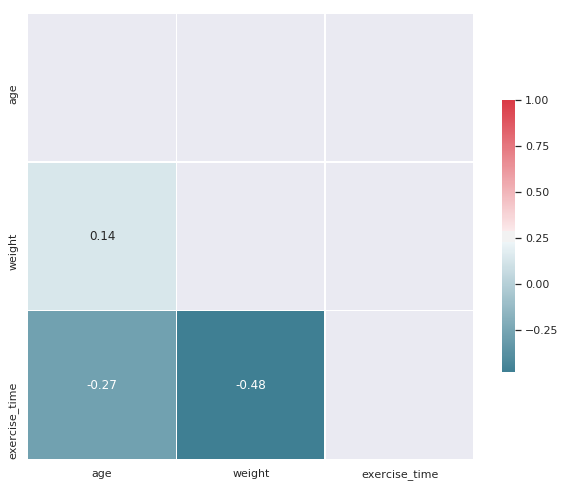

In [194]:
def correlation_heatmap(data=None, vmax=1, annot=True, corr_type='pearson'):
    if data is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    # Taken from the seaborn example at:
    # http://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Compute the correlation matrix
    corr = data.corr(corr_type)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, annot=annot, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=axes)
    plt.show()
    plt.close()
    
correlation_heatmap(df)

Heatmap shows us correlations between variables, which give us idea of `age` or `weight` is affected by independent variable `exercise_time`.

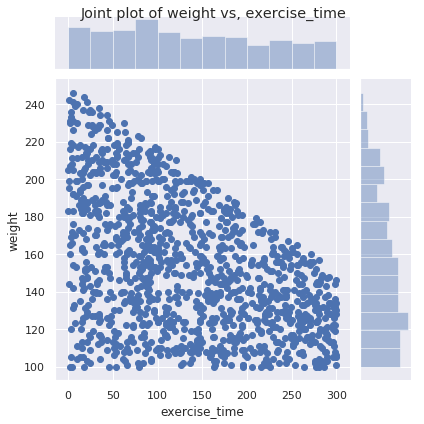

In [195]:
col_name1 = 'weight'
col_name2 = 'exercise_time'
sns.jointplot(x=col_name2,y=col_name1,data=df)
plt.suptitle(f'Joint plot of {col_name1} vs, {col_name2}');

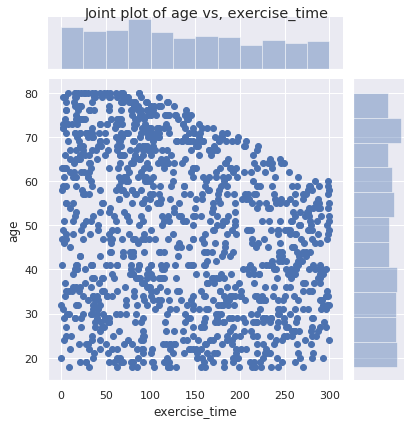

In [196]:
col_name1 = 'age'
col_name2 = 'exercise_time'
sns.jointplot(x=col_name2,y=col_name1,data=df)
plt.suptitle(f'Joint plot of {col_name1} vs, {col_name2}');

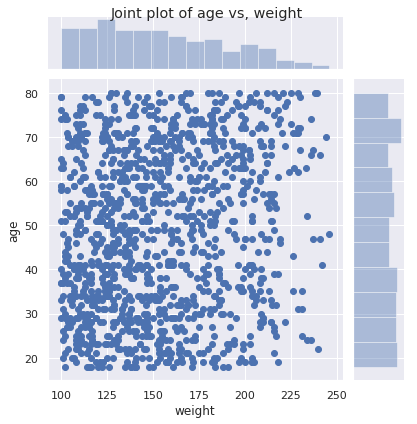

In [197]:
col_name1 = 'age'
col_name2 = 'weight'
sns.jointplot(x=col_name2,y=col_name1,data=df)
plt.suptitle(f'Joint plot of {col_name1} vs, {col_name2}');

We can see from first joint density plot `weight vs. exercise time` time are negatively correlated, whereas `age vs. exercise time` also has slight negative correlation which affects the weight our dependent variable. 

This gives us rough idea that `age` is indeed the **spurious** aka confounding variable. 

Let's start with cross tab to further see it,

In [198]:
exercise_time_bins = pd.cut(df['exercise_time'], 5)
weight_bins = pd.cut(df['weight'], 5)
age_bins = pd.cut(df['age'], 5)
ex_wt_ct = pd.crosstab(exercise_time_bins, weight_bins)
ex_wt_ct

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",53,44,61,76,44
"(60.0, 120.0]",65,76,93,73,9
"(120.0, 180.0]",71,67,56,29,0
"(180.0, 240.0]",79,74,38,1,0
"(240.0, 300.0]",107,74,10,0,0


This conforms to our hypothesis that `weight` and `exercise time` are negatively correlated, but hard to see until we plot it,

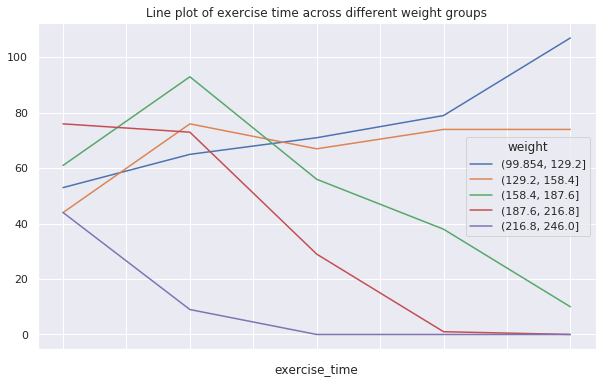

In [199]:
fig, ax = plt.subplots(figsize = (10,6))
ex_wt_ct.plot(ax=ax)
plt.title('Line plot of exercise time across different weight groups');

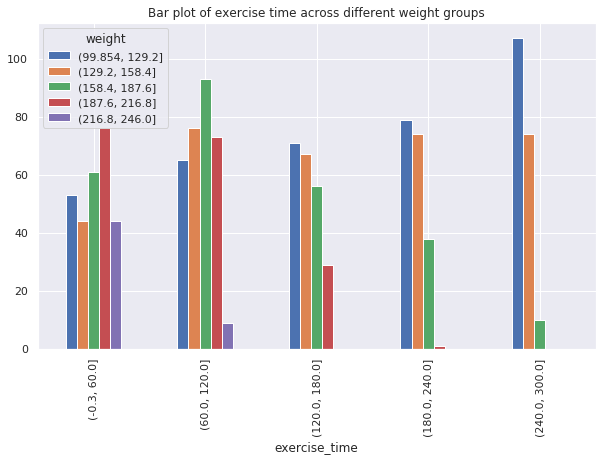

In [200]:
fig, ax = plt.subplots(figsize = (10,6))
ex_wt_ct.plot(kind='bar', ax=ax)
plt.title('Bar plot of exercise time across different weight groups');

We can see from both line plot as well as bar plot, exercise time goes up higher weight groups tends to decrease like red and purple bar, whereas lower weight groups like blue and orange increases, which makes sense as our hypothesis was, "People that exercise more tend to weight less".

Now, let's see the confounding variable, `age`

In [201]:
ex_age_ct = pd.crosstab(exercise_time_bins, age_bins)
ex_age_ct

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
exercise_time,,,,,
"(-0.3, 60.0]",52,52,41,46,87
"(60.0, 120.0]",46,55,42,71,102
"(120.0, 180.0]",54,42,39,40,48
"(180.0, 240.0]",61,47,34,41,9
"(240.0, 300.0]",43,57,67,24,0


We can see across higher ages 55 above (last two columns) the exercise time increases then suddenly drops of, while younger age groups also has lower exercise time, compared to middle ages group.

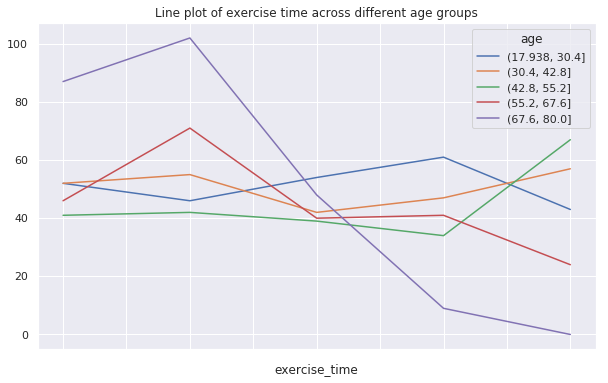

In [202]:
ex_age_ct = pd.crosstab(exercise_time_bins, age_bins)
fig, ax = plt.subplots(figsize = (10,6))
ex_age_ct.plot(ax=ax)
plt.title("Line plot of exercise time across different age groups");

Line plot tells us frequency in older age groups decreases as exercise time increases.

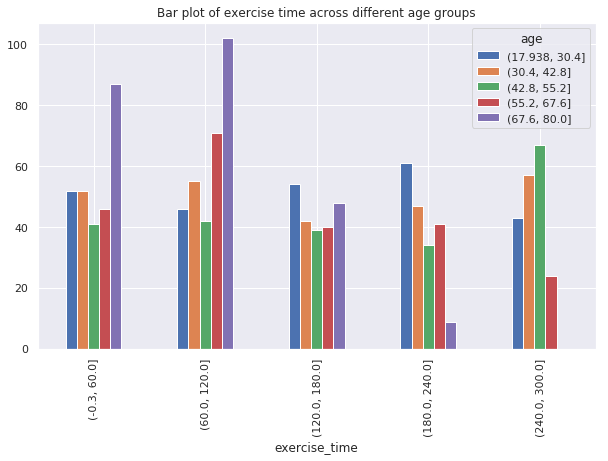

In [144]:
ex_age_ct = pd.crosstab(exercise_time_bins, age_bins)
fig, ax = plt.subplots(figsize = (10,6))
ex_age_ct.plot(kind='bar', ax=ax)
plt.title("Bar plot of exercise time across different age groups");

Similarily bar plot also shows age groups affect exercise time.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)